In [9]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd:float
    total_amount:float
    currency: Literal["INR","EUR"]
    total:float

In [10]:
def calc_total(state:PortfolioState)->PortfolioState:
        state["total_amount"] = state["amount_usd"] * 1.18
        return state

In [11]:
def convert_to_inr(state:PortfolioState)->PortfolioState:
    state["total"] = state["total_amount"] * 77.45
    return state

def convert_to_eur(state:PortfolioState)->PortfolioState:
    state["total"] = state["total_amount"] * 0.9
    return state

def get_curr(state:PortfolioState)->str:
    return state["currency"]

In [12]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "calc_total")
builder.add_conditional_edges("calc_total", get_curr,  { "INR" : "convert_to_inr" , "EUR" : "convert_to_eur" })
builder.add_edge(["convert_to_inr" , "convert_to_eur"], END)

graph = builder.compile()

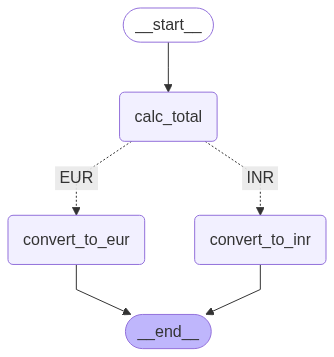

In [19]:
from IPython.display import display , Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
graph.invoke({"amount_usd": 100 , "currency" : "EUR"})

{'amount_usd': 100, 'total_amount': 118.0, 'currency': 'EUR', 'total': 106.2}